Пусть {ε_n },n=0,1,…N, - последовательность независимых случайных величин c Mε_n=0,Dε_n=σ^2.

	Докажите, что последовательность {ξ_n }, ,n=0,1,…N,

ξ_0=ε_0,ξ_1=ε_0+ε_1 (1+αε_0 ),
 ξ_(n+1)=ε_0+ε_1 (1+αε_0 )+∑_(j=1)^n▒〖ε_(j+1) (1+αε_j+βε_(j-1) ) 〗,n≥1,
является мартингалом относительно потока {F_n },F_n=σ(ε_0,ε_1,…,ε_n ).

Найдите квадратическую характеристику 〈ξ〉_n.

	Для заданных N, σ, смоделируйте  M нормально распределенных последовательностей {ε_n }, вычислите соответствующие последовательности {ξ_n } , используя заданные α и β. Несколько последовательностей выведите на печать.
  
	Изучите на основе смоделированных траекторий закон распределения СВ ξ_N/√(〈ξ〉_N ) (Постройте гистограмму, определите вид распределения, оцените параметры, проверьте по критерию Пирсона). Экспериментально проверьте, зависит ли этот закон от закона распределения последовательности {ε_n }.


In [ ]:
import numpy as np
import scipy as sp
import seaborn as sb
import math
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable
from scipy.stats import norm

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th)
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [ ]:
N=150
M=120
sigma=1
alpha=-3
beta=0.4

In [ ]:
epsilon=[]
for i in range(M):
  buf=[]
  for j in range(N):
    buf.append(round(np.random.uniform(-3**0.5,3**0.5), 3))
  epsilon.append(buf)

#np.savetxt('epsilon1.txt', epsilon, fmt='%f')


epsilon = np.loadtxt('epsilon1.txt', dtype=float)

print('\n'.join('\t'.join(map(str, row)) for row in epsilon))

-1.501	-0.397	-0.427	0.432	-0.978	1.555	-0.218	-0.164	-1.311	0.164	-0.922	0.687	-0.088	1.033	-1.703	0.204	0.353	-0.36	-0.013	-0.157	1.053	-0.467	-0.207	-1.651	1.137	0.063	-1.047	-0.514	0.081	-1.664	-1.621	0.576	-1.266	-1.633	-1.654	0.247	-1.01	-1.39	-0.396	1.331	1.44	-1.387	0.733	0.721	-0.4	-0.845	1.483	0.729	1.293	0.482	0.779	1.415	0.349	1.011	1.553	0.983	-0.499	1.204	0.829	-0.001	0.681	-1.289	1.175	1.216	1.727	1.662	1.199	1.02	1.426	0.656	-1.618	0.915	-0.295	-0.682	0.67	1.572	-1.499	-0.54	0.512	-0.656	1.256	-0.072	-1.601	-1.34	-1.431	-0.444	0.873	0.417	0.743	-0.804	0.488	-0.323	1.553	-0.739	-0.729	1.663	-1.718	1.081	1.591	-1.641	1.559	0.485	-0.839	1.678	1.002	-0.42	-0.458	-0.993	1.23	-1.616	-1.383	1.12	-0.489	0.825	0.269	-1.002	0.451	0.999	-0.428	-0.244	0.698	1.276	0.564	-0.311	0.745	-1.706	-1.523	0.082	-0.585	-0.733	0.361	0.336	1.708	1.369	0.813	-0.554	1.224	-0.457	-0.327	-1.247	1.304	-1.221	-0.088	0.836	0.644	-1.363	1.352	-0.546	0.177	1.659
-1.254	1.171	-0.428	-1.029	-0.16	-0.694	-

In [ ]:
ksi=[]
for i in range(M):
  buf=[]
  for j in range(N):
    if j==0: buf.append(epsilon[i][0])
    elif j==1: buf.append(epsilon[i][0]+epsilon[i][1]*(1+alpha*epsilon[i][0]))
    else:
      buf.append(buf[j-1]+epsilon[i][j]*(1+alpha*epsilon[i][j-1])+beta*(epsilon[i][j-2]))
  ksi.append(buf)
print('\n'.join('\t'.join(map(str, row)) for row in ksi))

-1.501	-3.685691	-5.221648	-4.395056	-4.276368	2.0138020000000005	2.4215720000000007	2.7723160000000004	0.7291040000000006	1.4725160000000004	0.4797400000000005	3.1325820000000006	2.8571500000000007	4.437662	7.977059000000001	9.636495	9.092259	9.195099	9.309259	9.002136	10.545899	11.491352000000001	11.415545000000002	8.552474000000002	15.238235000000001	14.425942000000003	14.031625000000004	11.928351000000003	11.715453000000004	10.250205000000003	0.5695730000000028	3.2810610000000024	3.554309000000002	-4.050424999999998	-14.313770999999996	-13.494356999999995	-14.417546999999995	-19.920446999999996	-22.371766999999995	-20.015538999999997	-24.483858999999995	-19.346618999999997	-14.987605999999996	-16.406884999999996	-15.648484999999996	-17.219084999999996	-12.136679999999995	-14.989000999999993	-15.930591999999994	-17.026669999999996	-16.856903999999997	-18.555958999999998	-19.376863999999998	-18.858380999999998	-21.876029999999997	-25.068426999999996	-23.474675999999995	-20.0750879999

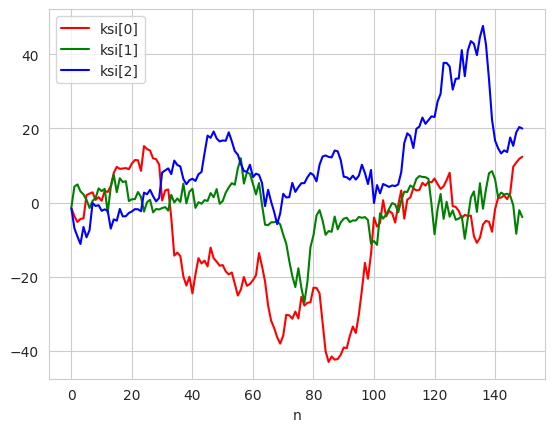

In [ ]:
xx = np.arange (0, N)
sb.set_style("whitegrid")
plt.plot(xx, ksi[0], color='red',label='ksi[0]')
plt.plot(xx, ksi[1], color='green',label='ksi[1]')
plt.plot(xx, ksi[2], color='blue',label='ksi[2]')
plt.xlabel("n")
plt.legend()
plt.show()

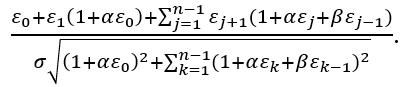

In [ ]:
ksii=0
zeta=[]
for i in range(M):
  sum=0
  for j in range(1,N-1):
    sum+=(1+alpha*epsilon[i][j]+beta*epsilon[i][j-1])**2
  ksii=(1+alpha*epsilon[i][0])**2+sum
  zeta.append(ksi[i][N-1]/(sigma*((ksii)**0.5)))


print(zeta)

[0.31564311466435957, -0.09520969074276465, 0.5137784170540606, 1.4013579286045674, 0.18584461337013078, 0.2667047185154926, -1.167238895440542, 0.008780551476220193, 0.19206979658142917, -0.20645992523201182, 0.2770678873608467, 1.0869388954559533, -0.5523716859308166, -0.328362713952672, 0.9495758113033436, 1.2224601162584727, -0.5918744713649183, -2.191846278394431, 0.4080611722582466, 0.310849184961576, -1.85355276314065, 0.750741365480996, 1.1201341890198444, 0.46597055961851397, 0.5628159483018846, 0.35630195082564386, 1.4872567401135721, 0.7688353473287525, 0.27792890281169874, 1.011935375756197, 0.5027023277977009, -0.329392233344986, -0.16616483534281257, -0.24387820456382342, 2.9990882728527195, 0.15344035690390906, -0.33670370375746017, 0.24169919501829198, 0.6583118321378276, -0.5237497627032676, -0.7497170952090557, -1.2859087856452776, -1.030355561864288, 0.21912093978625924, -0.6474344966336429, -0.19127096665040455, -0.04381777136198218, 0.8954078159934976, 1.4056557897

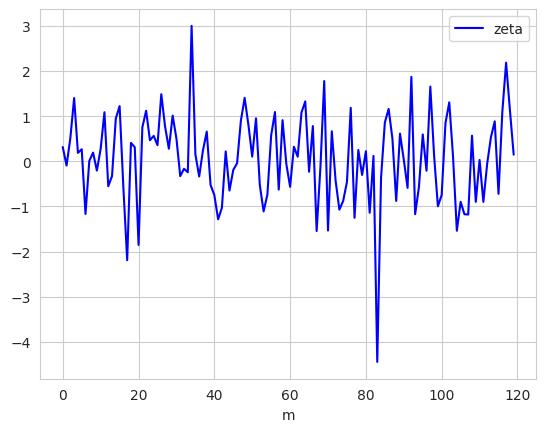

In [ ]:
xx = np.arange (0, M)
sb.set_style("whitegrid")
plt.plot(xx, zeta, color='blue',label='zeta')
plt.xlabel("m")
plt.legend()
plt.show()

In [ ]:
z=zeta
l=math.trunc(1 + math.log2(N))
print(l)
Max = np.amax(z)
Min = np.amin(z)
w = Max - Min
h = w / l
print(h)
print(w)

8
0.9305929321883797
7.4447434575070375


In [ ]:
print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))
x=z
hist, bin_edges = np.histogram(x, l)
bin_edges_average = np.zeros(bin_edges[:l].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / N

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Число интервалов l = 8
Шаг(ширина интервалов группировки) h = 0.930593


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            -3.980358718560128           |                        1.0                         |
|           -3.0497657863717484           |                        0.0                         |
|           -2.1191728541833688           |                        2.0                         |
|            -1.188579921994989           |                        22.0                        |
|           -0.2579869898066094           |                        40.0                        |
|            0.6726059423817703           |                        41.0                        |
|             1.60319887457015            |           

In [ ]:
sum=0
for i in range(M):
  sum+=zeta[i]
mu=sum/M
xm=mu
xm

0.05865879134756533

In [ ]:
sum=0
for i in range(M):
  sum+=(zeta[i]-mu)**2
s2=sum/(M-1)
s2

0.9921088717399761

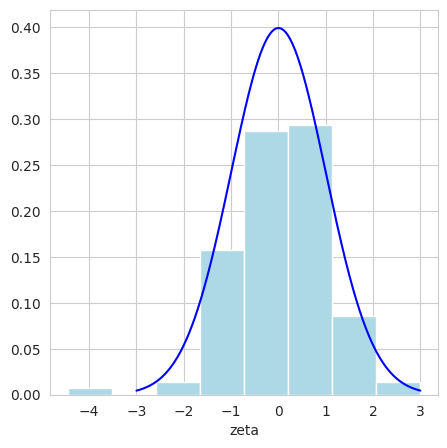

In [ ]:
sb.set_style("whitegrid")
plt.figure(figsize=(5,5))
xx = np.arange (-3, 3, 0.001)
X = Int
Y = p / h
p_norm0 = sp.stats.norm.pdf(xx,0,1)
plt.bar(X, Y, width=h, color='lightblue')
plt.plot(xx, p_norm0, color='blue', label='p_norm')
plt.xlabel("zeta")
plt.show()

In [ ]:
lmbd=0.05
n=M

In [ ]:
pk=[]
sum=0
pk.append(norm.cdf(intl[1],0,1))
for i in range(1,l-1):
  pk.append(norm.cdf(intl[i+1],0,1)-norm.cdf(intl[i],0,1))
for j in range(0,l-1):
  sum+=pk[j]
pk.append(1-sum)
for i in range(0,l):
  print(round(pk[i],4))
sum=0
for j in range(0,l):
  sum+=pk[j]
print(sum)

0.0002
0.0047
0.0442
0.1857
0.3474
0.2903
0.1083
0.0193
1.0


In [ ]:
v=[]
for j in range(0,l):
  v.append(pk[j]*n)
for i in range(0,l):
  print(round(v[i],3))

0.026
0.559
5.304
22.281
41.684
34.836
12.994
2.316


In [ ]:
chisq=sp.stats.chi2.ppf(1-lmbd, 2)
print(chisq)

5.991464547107979


In [ ]:
chisq_v=0
for i in range(3,l-2):
  chisq_v+=((f2[i]-v[i])**2)/(v[i]) #xi
chisq_v+=((f2[6]+f2[7]+-v[6]-v[7])**2)/(v[6]+v[7])
chisq_v+=((f2[0]+f2[1]+f2[2]-v[2]-v[0]-v[1])**2)/(v[2]+v[0]+v[1])
print(chisq_v)

2.691491749955505


In [ ]:
chisq=sp.stats.chi2.ppf(1-lmbd, l-2-1)
print(chisq)

11.070497693516351


In [ ]:
chisq_v=0
for i in range(0,l):
  chisq_v+=((f2[i]-v[i])**2)/(v[i]) #xi
print(chisq_v)

39.833300516127736


In [ ]:
chisq=sp.stats.chi2.ppf(1-lmbd, l-1-2-1)
print(chisq)

9.487729036781154


In [ ]:
chisq_v=0
for i in range(2,l):
  chisq_v+=((f2[i]-v[i])**2)/(v[i]) #xi
chisq_v+=((f2[0]+f2[1]-v[0]-v[1])**2)/(v[0]+v[1])
print(chisq_v)

3.6333304480532185
